# Эксперименты с командой QueryAdjust

In [1]:
import numpy as np

from pysim.experiments.utility.rfid_helper import(
    calculate_simulations, generation_interval, plot_simulations_results
)
from pysim.models.rfid.params import default_params, inner_params
from pysim.experiments.utility.rfid_helper import(
    compute_reading_zone, estimate_generation_interval
)

In [2]:
IMG_DIRECTORY = "rfid/multiple_tag/"
JSON_DIRECTORY = "../results/result_jsons/rfid/multiple_tag/"

In [3]:
TAGS_IN_READING_ZONE = (5, 15, 25)

tag_intervals = [
    estimate_generation_interval(tags_amount, compute_reading_zone())
    for tags_amount in TAGS_IN_READING_ZONE
]
tag_period_params = [
    {"label": f"{n} меток", "generation_interval": (generation_interval, t)}
    for n, t in zip(TAGS_IN_READING_ZONE, tag_intervals)
]

In [10]:
q_variable = np.arange(0, 16, 1)
colllision_params_list = []

for tag_params_item in tag_period_params:
    colllision_params_list.append({
        'tari': default_params.tari,
        'encoding':  default_params.encoding,
        'tid_word_size': default_params.tid_word_size,
        'power': default_params.power_dbm,
        'num_tags': 250,
        'speed': default_params.speed,
        'reader_offset': default_params.reader_offset,
        'tag_offset': default_params.tag_offset,
        'altitude': 4,
        'useadjust': True,
        "generation_interval": tag_params_item["generation_interval"],
        "label": tag_params_item["label"]
    })

In [5]:
key_name = lambda params: f"{params["label"]}"

In [11]:
collision_result = calculate_simulations(
    variable="q",
    variable_values=q_variable,
    params_list=colllision_params_list,
    key_fn=key_name,
    use_json=False,
    save_results=False,
    json_directory=JSON_DIRECTORY,
    file_name="q_collision_adjust.json"
)

Моделирование по переменной q: 100%|██████████| 3/3 [00:41<00:00, 13.93s/it]


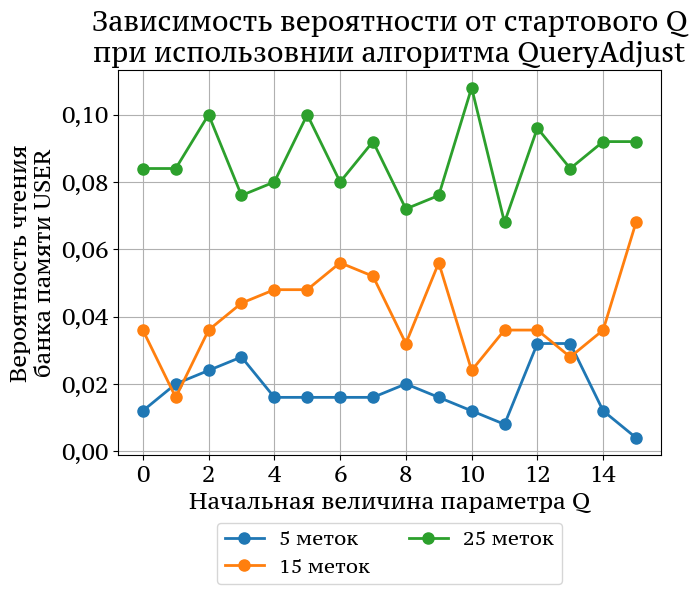

In [12]:
plot_simulations_results(
    results_list=[collision_result["read_user_probs"]],
    labels_list=[key_name(params) for params in tag_period_params],
    titles=["Зависимость вероятности от стартового Q\nпри использовнии алгоритма QueryAdjust"],
    x_variable=q_variable,
    x_label="Начальная величина параметра Q",
    image_name="Collision probs QAdjust_0",
    save_fig=False,
    image_directory=IMG_DIRECTORY,
    integer_labels=True
)